## Load Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("..")

import numpy as np
from importlib import reload 
import networkx as nx 
from tqdm import tqdm 

import torch
import torch_geometric as geonn
from torch_geometric.loader import DataListLoader, DataLoader

from utilities import reader
import vis

import test as tst

from importlib import reload

## Load GPU and test dataset

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Running on {}. GPU model : {}".format(device, torch.cuda.get_device_name(0)))

path_dataset = "../../dataset/dConstant"

dataset_test = reader.BuildDataset(root = path_dataset, mode = 'test', precision = torch.float)
loader_test = DataListLoader(dataset_test,  batch_size = 50, shuffle = False, num_workers = 0)
print("Number of samples in the test dataset : ", len(dataset_test))

Running on cuda. GPU model : Quadro T2000 with Max-Q Design
Number of samples in the test dataset :  2000


Run the following cell to compute the average diameter of the samples in the test dataset

In [3]:
# distance = []
# for k in tqdm(range(len(dataset_test))):

#     data = dataset_test[k]
#     dictpos = {}
#     for i in range(len(data.pos)):
#         dictpos[i] = np.asarray([data.pos[i,0].item(), data.pos[i,1].item()])
    
#     net_data = geonn.utils.to_networkx(data, to_undirected = False, remove_self_loops=False)
#     G = net_data.to_undirected()
#     G.remove_edges_from(nx.selfloop_edges(G))
#     G.remove_nodes_from(list(nx.isolates(G)))
#     d = nx.distance_measures.diameter(G)
#     distance.append(d)
#     dictpos.clear()
    
# print("Mean geodesic distance : ", np.mean(distance))
# print("Max geodesic distance : ", np.max(distance))
# print("Min geodesic distance : ", np.min(distance))

In [13]:
ckpt_30_0_9 = torch.load("../results/30_ite_gamma_0_9/ckpt/running_model.pt")
ckpt_30_1_0 = torch.load("../results/30_ite_gamma_1/ckpt/running_model.pt")
ckpt_70_0_9 = torch.load("../results/70_ite_gamma_0_9/ckpt/running_model.pt")
ckpt_70_1_0 = torch.load("../results/70_ite_gamma_1/ckpt/running_model.pt")

list_running_train_model = [ckpt_30_0_9["hist_train"], ckpt_30_1_0["hist_train"], ckpt_70_0_9["hist_train"], ckpt_70_1_0["hist_train"]]
list_running_val_model = [ckpt_30_0_9["hist_val"], ckpt_30_1_0["hist_val"], ckpt_70_0_9["hist_val"], ckpt_70_1_0["hist_val"]]

list_running_names = ["30_0_9", "30_1_0", "70_0_9", "70_1_0"]

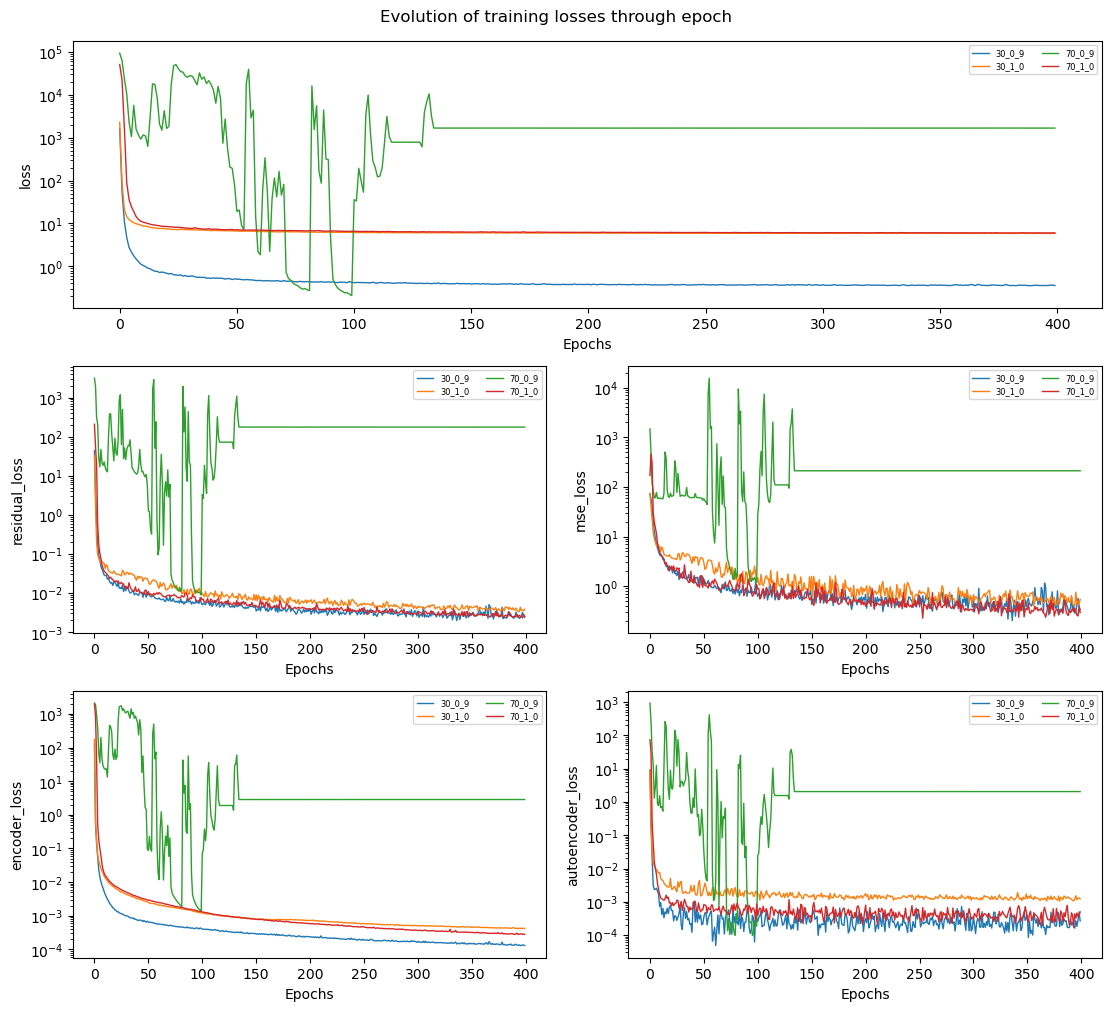

In [14]:
reload(vis)
vis.visualize_losses(list_running_train_model, list_running_names)

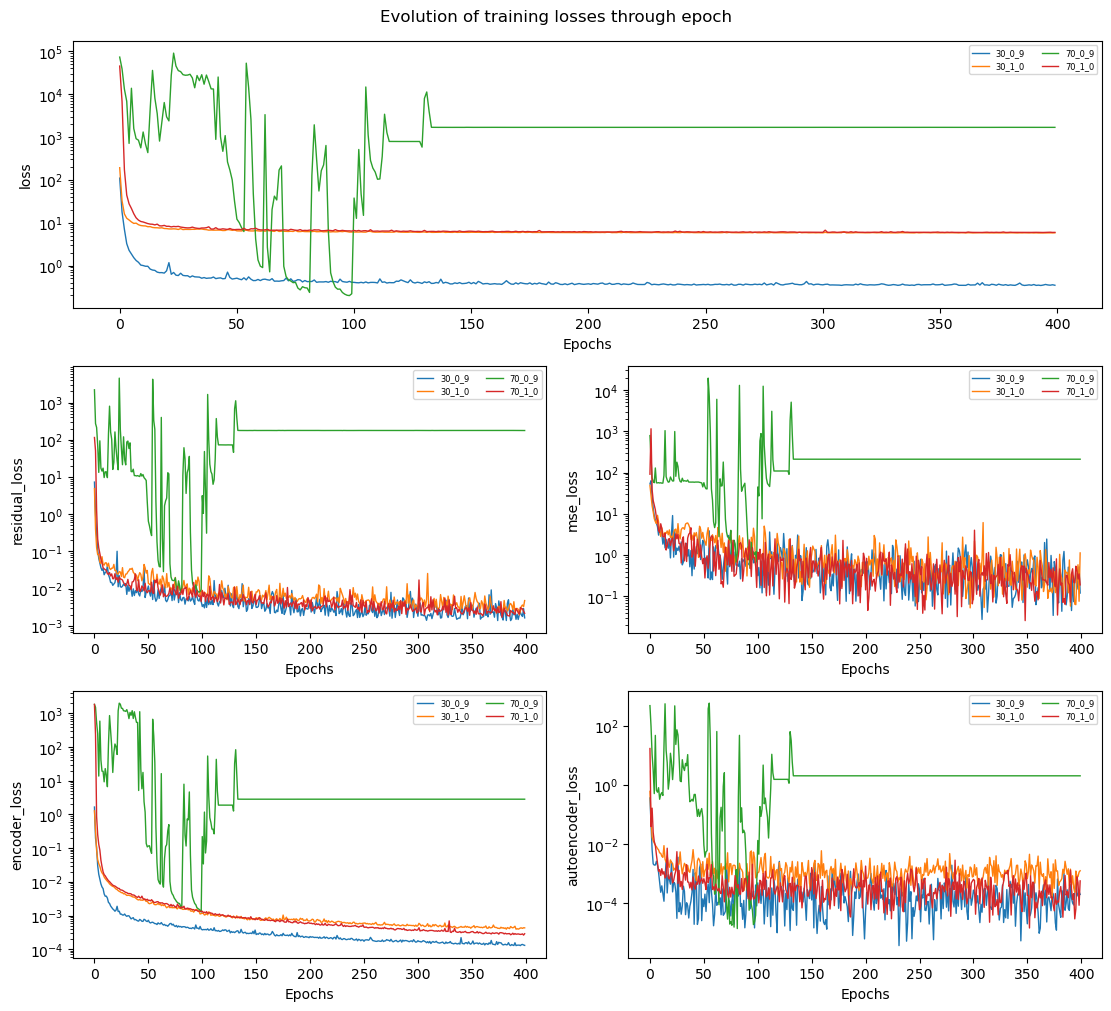

In [15]:
reload(vis)
vis.visualize_losses(list_running_val_model, list_running_names)

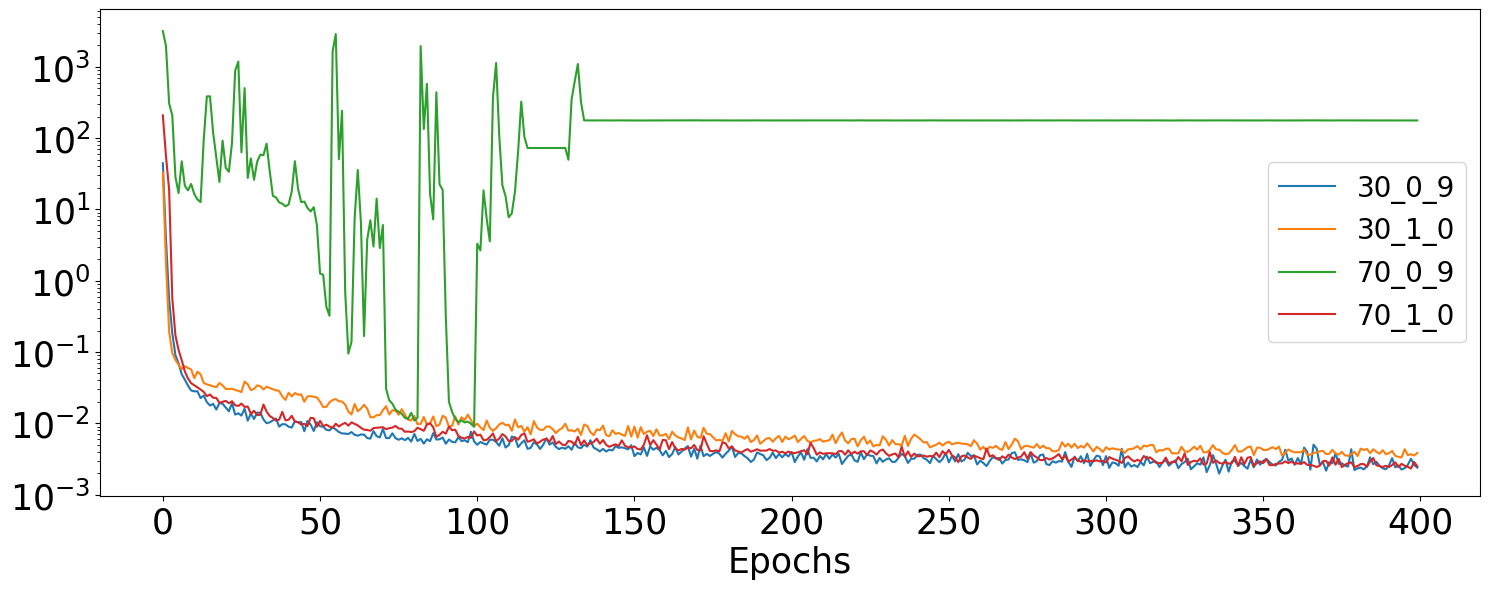

In [17]:
reload(vis)

vis.plot_multi_residual(list_running_train_model, list_running_names, "img")

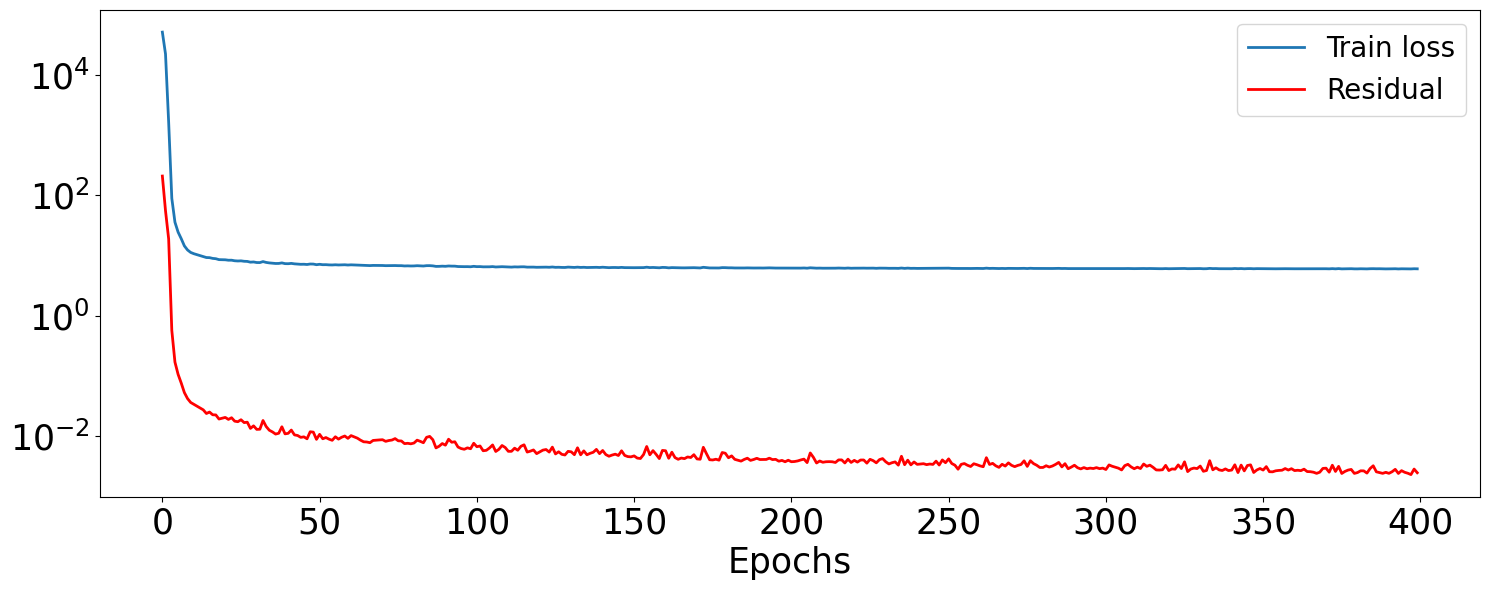

In [18]:
reload(vis)

vis.losses_on_same_plot(ckpt_70_1_0["hist_train"], "img/")

In [19]:
ckpt_best_30_0_9 = torch.load("../results/30_ite_gamma_0_9/ckpt/best_model.pt")
ckpt_best_30_1_0 = torch.load("../results/30_ite_gamma_1/ckpt/best_model.pt")
ckpt_best_70_0_9 = torch.load("../results/70_ite_gamma_0_9/ckpt/best_model.pt")
ckpt_best_70_1_0 = torch.load("../results/70_ite_gamma_1/ckpt/best_model.pt")

list_best_model = [ckpt_best_30_0_9, ckpt_best_30_1_0, ckpt_best_70_0_9, ckpt_best_70_1_0]
list_names = ["30_0_9", "30_1_0", "70_0_9", "70_1_0"]

### Test on the full dataset

In [20]:
reload(tst)

tst.test_dataset(list_best_model, list_names, loader_test, device)

Random seed set as 1234
Evaluation model :  30_0_9
Default config :  {'latent_dim': 10, 'k': 30, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:07<00:00,  5.07it/s]


std Res :  0.00016274427440288362
std MSE :  0.024893213689624282
std Dirichlet :  1.7807141572255378e-05
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Name │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ 30_0_9 │  1.324e-03 │ 6.375e-02 │      1.210e-04 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
Evaluation model :  30_1_0
Default config :  {'latent_dim': 10, 'k': 30, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/01_09_2023_17:35:03/logs'}


100%|██████████| 40/40 [00:07<00:00,  5.70it/s]


std Res :  0.0004074785721959192
std MSE :  0.030457920166610798
std Dirichlet :  0.00014902646111486365
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Name │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ 30_1_0 │  1.953e-03 │ 6.583e-02 │      4.810e-04 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
Evaluation model :  70_0_9
Default config :  {'latent_dim': 10, 'k': 70, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/18_09_2023_16:06:23/logs'}


100%|██████████| 40/40 [00:16<00:00,  2.49it/s]


std Res :  0.000813619593135305
std MSE :  0.22516984936354312
std Dirichlet :  0.0002017783499988958
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Name │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ 70_0_9 │  7.610e-03 │ 6.990e-01 │      1.809e-03 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
Evaluation model :  70_1_0
Default config :  {'latent_dim': 10, 'k': 70, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/05_09_2023_15:40:03/logs'}


100%|██████████| 40/40 [00:16<00:00,  2.48it/s]

std Res :  0.00019796690393853407
std MSE :  0.010453646637622613
std Dirichlet :  9.969550931588064e-06
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Name │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ 70_1_0 │  1.618e-03 │ 3.489e-02 │      1.277e-04 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


In [43]:
import time
t = 1000 * time.time()
np.random.seed(int(t) % 2**32)

alea = np.random.randint(len(dataset_test))
print("Random sample : ", alea)

data = dataset_test[alea]
print(data)

Random sample :  1768
Data(x=[520, 1], edge_index=[2, 3202], edge_attr=[3202, 3], y=[520, 1], pos=[520, 2], a_ij=[3202, 1], sol=[520, 1], prb_data=[520, 2], tags=[520, 1])


Random seed set as 1234
Default config :  {'latent_dim': 10, 'k': 200, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/05_09_2023_15:40:03/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        520 │  1.414e-03 │ 7.521e-02 │      2.309e-04 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


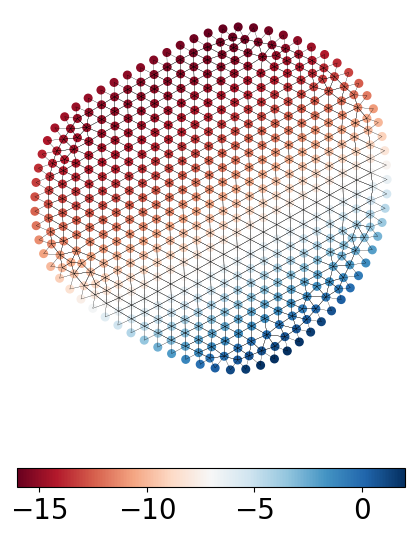

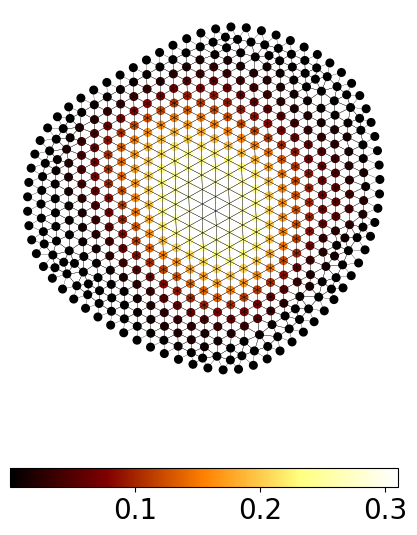

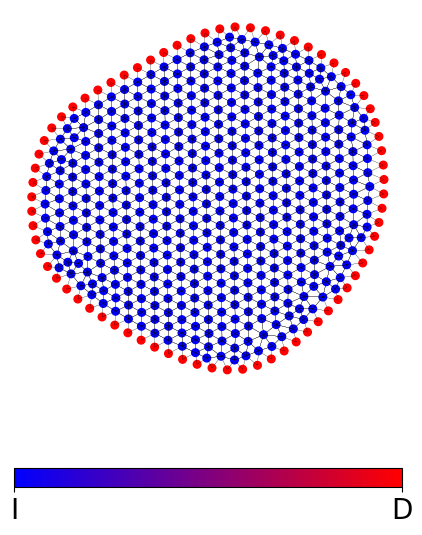

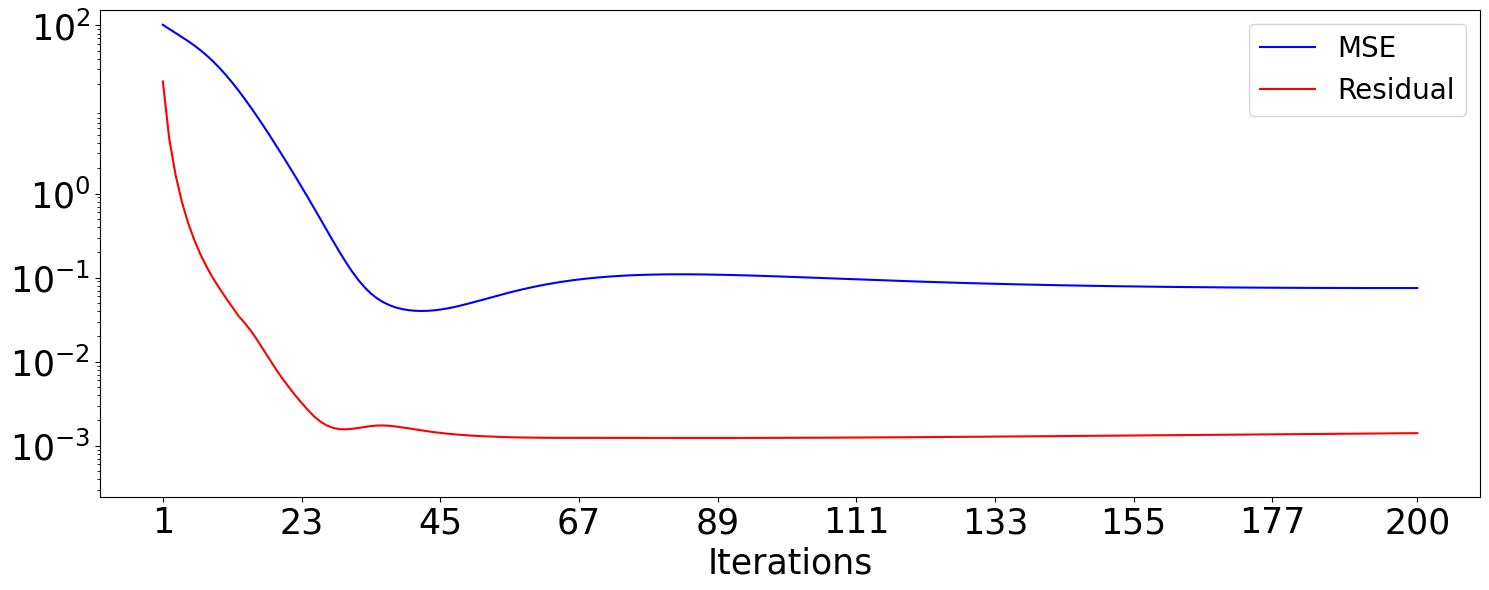

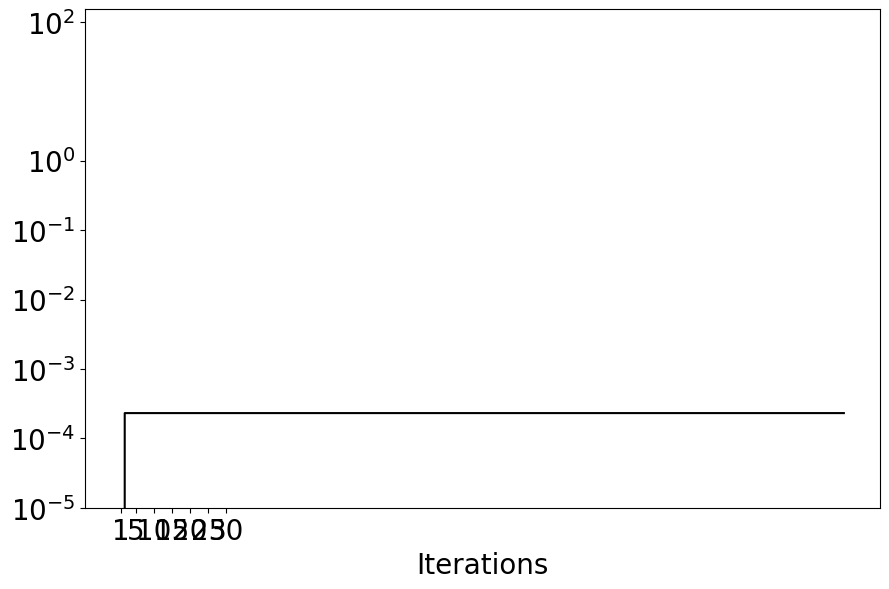

In [52]:
reload(vis)
reload(tst)

# Number 665
tst.solution_sample(ckpt_best_70_1_0, data, device)

In [46]:
reload(tst)

tst.test_dataset([ckpt_best_70_1_0, ckpt_best_30_0_9], ["70_1_0", "30_0_9"], loader_test, device)

Random seed set as 1234
Evaluation model :  70_1_0
Default config :  {'latent_dim': 10, 'k': 200, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/05_09_2023_15:40:03/logs'}


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


std Res :  0.00045417151521522304
std MSE :  0.06070953394156982
std Dirichlet :  9.969550931588064e-06
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Name │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ 70_1_0 │  3.398e-03 │ 2.483e-01 │      1.277e-04 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
Evaluation model :  30_0_9
Default config :  {'latent_dim': 10, 'k': 30, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}


100%|██████████| 40/40 [00:46<00:00,  1.16s/it]

std Res :  0.010121386415197192
std MSE :  0.042252420435494924
std Dirichlet :  1.7807141572255378e-05
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Name │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ 30_0_9 │  1.460e-02 │ 1.267e-01 │      1.210e-04 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


Random seed set as 1234
Random sample :  1889
Data(x=[458, 1], edge_index=[2, 2792], edge_attr=[2792, 3], y=[458, 1], pos=[458, 2], a_ij=[2792, 1], sol=[458, 1], prb_data=[458, 2], tags=[458, 1])
Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/05_09_2023_15:40:03/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        458 │  2.885e-03 │ 4.268e-02 │      1.875e-04 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


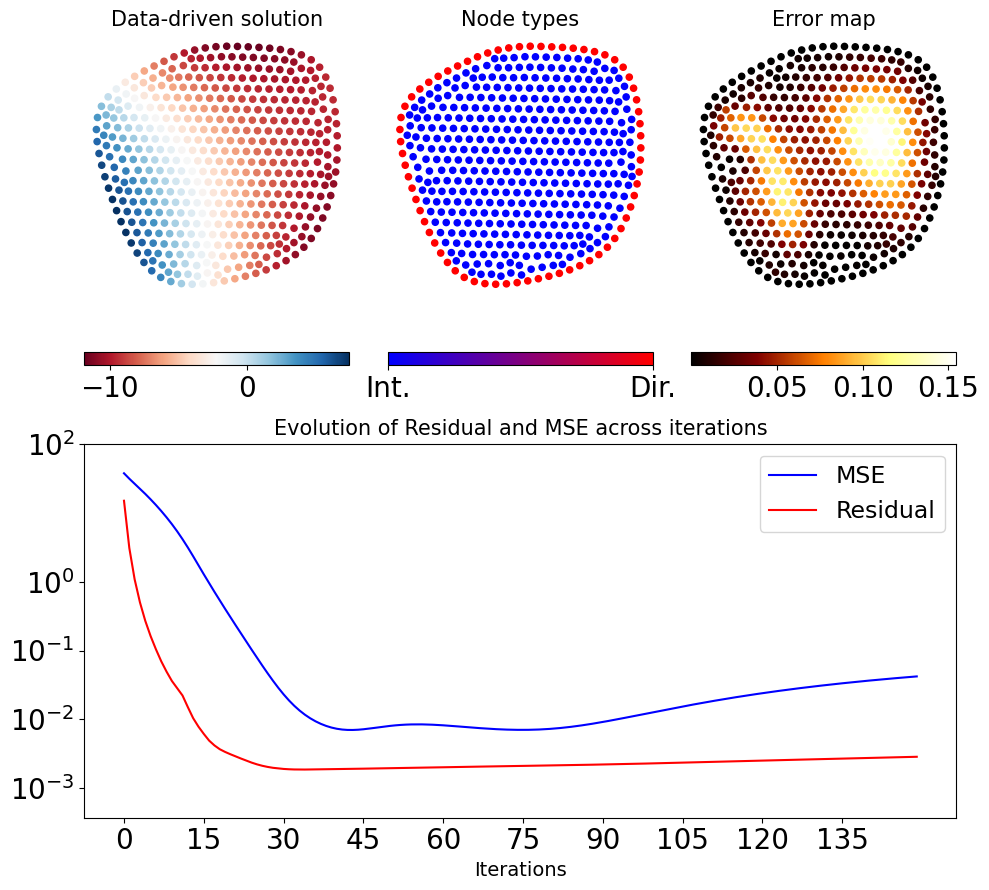

Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/01_09_2023_17:35:03/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        458 │  1.060e-02 │ 5.203e-02 │      1.834e-04 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


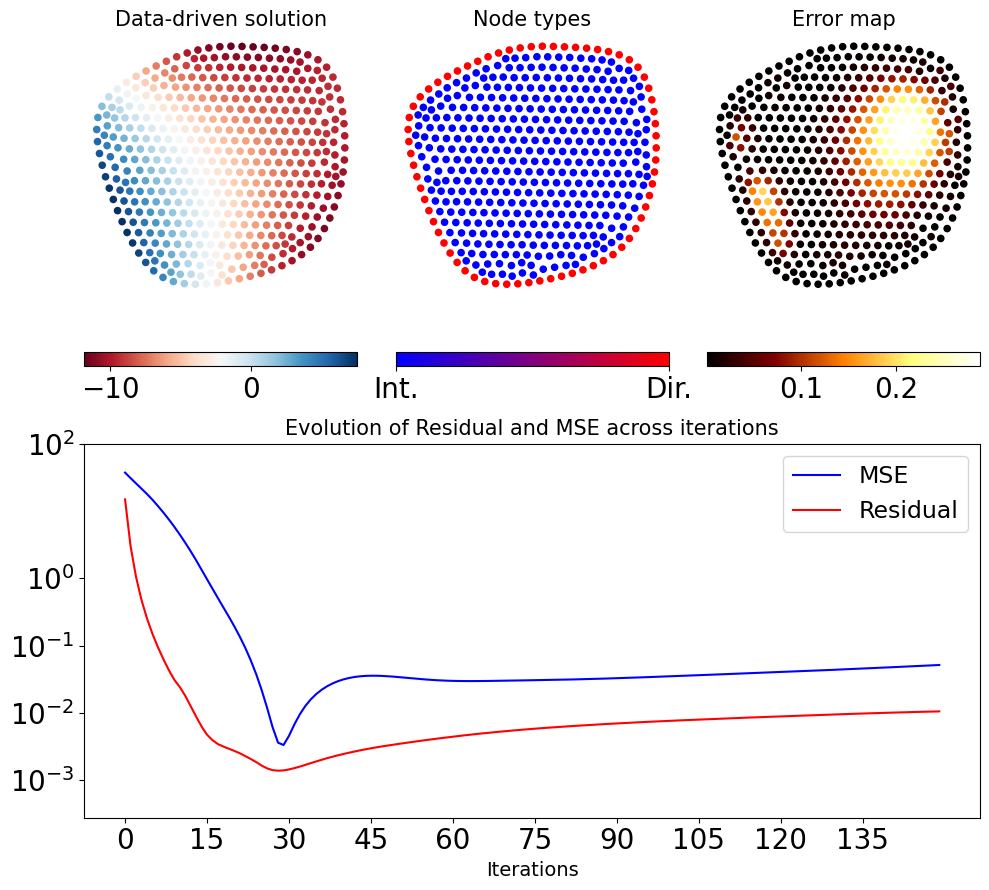

Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        458 │  1.719e-03 │ 1.030e-02 │      5.858e-05 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


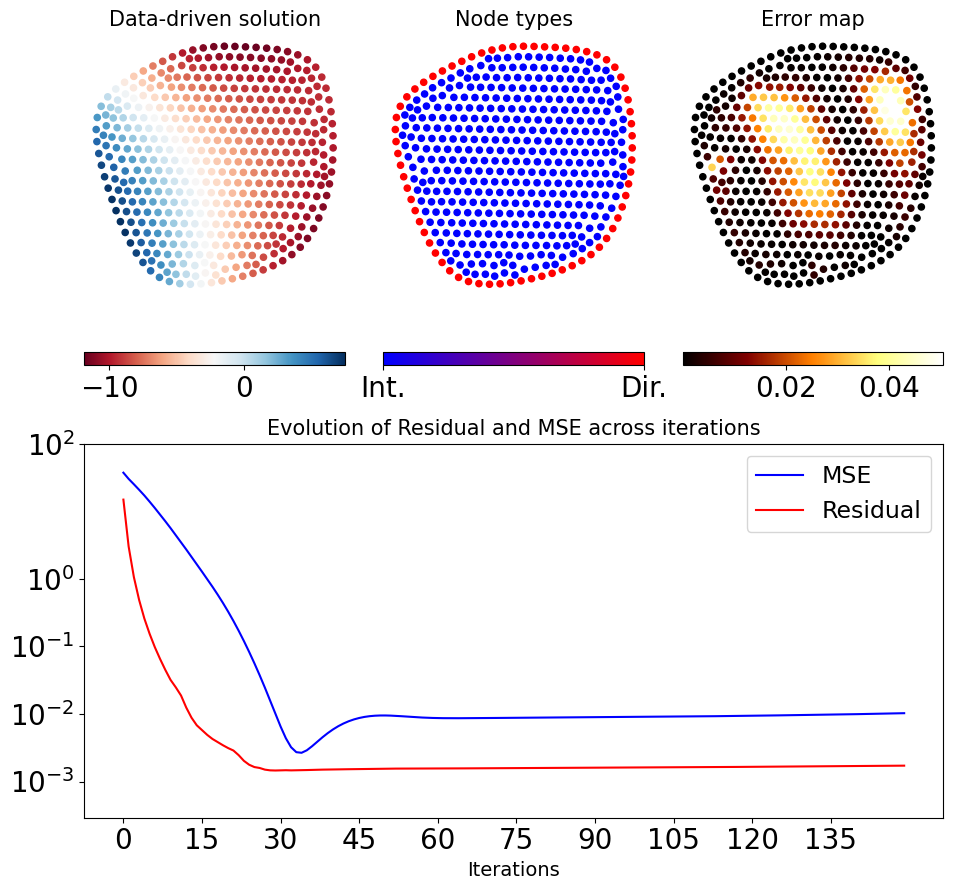

In [15]:
reload(vis)
reload(tst)

import time
t = 1000 * time.time()
np.random.seed(int(t) % 2**32)

alea = np.random.randint(len(dataset_test))
print("Random sample : ", alea)

data = dataset_test[alea]
print(data)

tst.solution_sample(ckpt_best_large_iteration, data, device)

tst.solution_sample(ckpt_best_original_no_gamma, data, device)

tst.solution_sample(ckpt_best_original_with_gamma, data, device)

In [31]:
reload(tst)

tst.test_dataset(list_best_model, list_names, loader_test, device)

Evaluation model :  DS-GPS Original
Default config :  {'latent_dim': 10, 'k': 70, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:23<00:00,  1.74it/s]


Evaluation model :  DS-GPS Constant
Default config :  {'latent_dim': 10, 'k': 70, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/01_09_2023_17:35:03/logs'}


100%|██████████| 40/40 [00:23<00:00,  1.72it/s]

std Res :  0.004896047102228086
std MSE :  0.06998683321531535
std Dirichlet :  0.00014902646111486365
┍━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name            │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ DS-GPS Original │  2.158e-03 │ 7.052e-02 │      1.210e-04 │
├─────────────────┼────────────┼───────────┼────────────────┤
│ DS-GPS Constant │  1.226e-02 │ 2.028e-01 │      4.810e-04 │
┕━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
